In [46]:
import pandas as pd

X = pd.read_csv("dataframe_with_previous_values.csv")
X


,7,7.0,5.0,5.0.1,0.0,8.0,6.0,8.0.1,2.0,6.0.1,2.0.1
0,9,7.0,7.0,5.0,5.0,0.0,8.0,6.0,8.0,2.0,6.0
1,5,9.0,7.0,7.0,5.0,5.0,0.0,8.0,6.0,8.0,2.0
2,9,5.0,9.0,7.0,7.0,5.0,5.0,0.0,8.0,6.0,8.0
3,0,9.0,5.0,9.0,7.0,7.0,5.0,5.0,0.0,8.0,6.0
4,6,0.0,9.0,5.0,9.0,7.0,7.0,5.0,5.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
4999984,5,2.0,1.0,6.0,1.0,3.0,9.0,3.0,4.0,9.0,5.0
4999985,4,5.0,2.0,1.0,6.0,1.0,3.0,9.0,3.0,4.0,9.0
4999986,4,4.0,5.0,2.0,1.0,6.0,1.0,3.0,9.0,3.0,4.0
4999987,2,4.0,4.0,5.0,2.0,1.0,6.0,1.0,3.0,9.0,3.0


In [47]:
#Training proocess of RL Agent

from RL_Agent import DeepQLearningRLAgent
import csv

def sum_to_index(arr, i):
  sum = 0
  for j in range(i + 1):  # Include the element at the i-th index
    sum += arr[j]
  return sum

predictions = []
actual_numbers = []

def run() :

    agent = DeepQLearningRLAgent()

    real_trade_starting_point = 25   # margin of real trade starts
    possible_real_points = 40        # 25 for 95 dollar capital (max 51 for 2105 dollars capital)
    stopping_profit = 30            # trade stop point while another outlier comes

    c = 0
    actual_consequent = 0
    p = 0
    Tp = 0
    ml = [1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4,4,5,5,6,7,8,9,10,11,12,14,16,18,20,22,25,28,32,36,40,45,50,57,64,72,81,91,103,116,130,146,165,185,208,234]
    RT1 = False
    RT2 = False
    Rc = 0
    seeking_outlier = 65

    digit_array = []
    reward = 0
    count = 0
    execute = True

    while execute :
     
        with open('dataframe_with_previous_values.csv', 'r') as file1:
            csv_reader1 = csv.reader(file1)

            for sequence in csv_reader1:
                count += 1
                for i in range(11) :
                    if i == 0 :
                        actual_next_number = int(float(sequence[i]))
                        actual_numbers.append(actual_next_number)
                    else :
                        digit_array.append(int(float(sequence[i])))
                
                print(digit_array)
                state = agent.get_state(reward, digit_array)
                predicted_number = agent.get_action(state)
                predictions.append(predicted_number)

                with open("sequences.csv", 'a', newline='') as f:  
                    f.write(f"{digit_array}\n")
                
                if predicted_number == int(float(actual_next_number)) :
                    with open("Demo_Wins.csv", 'a', newline='') as f:  
                        f.write(f"{actual_consequent}\n")
                    actual_consequent = 0
                    reward = 8
                else :
                    actual_consequent += 1
                    reward = -1

                if not(RT2) :
                    if predicted_number == int(float(actual_next_number)) :
                        if c >= seeking_outlier :
                            RT1 = True
                        c=0
                    else  :
                        c += 1         
                elif RT2 :
                    if (predicted_number == int(float(actual_next_number))) and Rc < possible_real_points - 1 :
                        p += ml[Rc+1]*8 - sum_to_index(ml, Rc)
                        Tp += ml[Rc+1]*8 - sum_to_index(ml, Rc)
                        with open("REAL_wins.csv", 'a', newline='') as f:  
                            f.write(f"consequent : {Rc} , Profit : {Tp}\n")
                        Rc=0

                        if p // stopping_profit == 1 :
                            RT1 = False
                            RT2 = False
                            p = 0
                            Rc=0
                            c = 0
                    else  :
                        Rc += 1
                        if Rc == possible_real_points :
                            RT1 = False
                            RT2 = False
                            p = 0
                            Rc=0
                            c = 0
                            Tp = Tp - sum_to_index(ml,(possible_real_points - 1))
                            with open("REAL_wins.csv", 'a', newline='') as f:  
                                f.write(f"!!!!!!!!!!!!!!!!!!!!!!!!!!! Profit : {Tp} !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\n")

                if RT1 and c == real_trade_starting_point :
                    RT2 = True

                next_state = agent.get_state(reward, digit_array)
                agent.update(state, predicted_number,reward,next_state)

                digit_array = []
                print('Total profit : ',Tp)
            
                if count == 1000 :
                    execute = False
                    break
                    

run()

C:\Users\a12u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[7, 5, 5, 0, 8, 6, 8, 2, 6, 2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Total profit :  0
[7, 7, 5, 5, 0, 8, 6, 8, 2, 6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Total profit :  0
[9, 7, 7, 5, 5, 0, 8, 6, 8, 2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Total profit :  0
[5, 9, 7, 7, 5, 5, 0, 8, 6, 8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Total profit :  0
[9, 5, 9, 7, 7, 5, 5, 0, 8, 6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Total profit :  0
[0, 9, 5, 9, 7, 7, 5, 5, 0, 8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Total profit :  0
[6, 0, 9, 5, 9, 7, 7, 5, 5, 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Total profit :  0
[8, 6, 0, 9, 5, 9, 7, 7, 5, 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Total profit :  0
[4, 8, 6, 0, 9, 5, 9, 7, 7, 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Total profit :  0
[4, 4, 8, 6, 0, 9, 5, 9, 7, 7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Total profit :  0
[5, 4, 4, 8, 6, 0, 9, 5, 9, 7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Total profit :  0
[3, 5, 4, 4, 8, 6, 0, 9, 5, 9]
1/1 ━━━━━━━━━

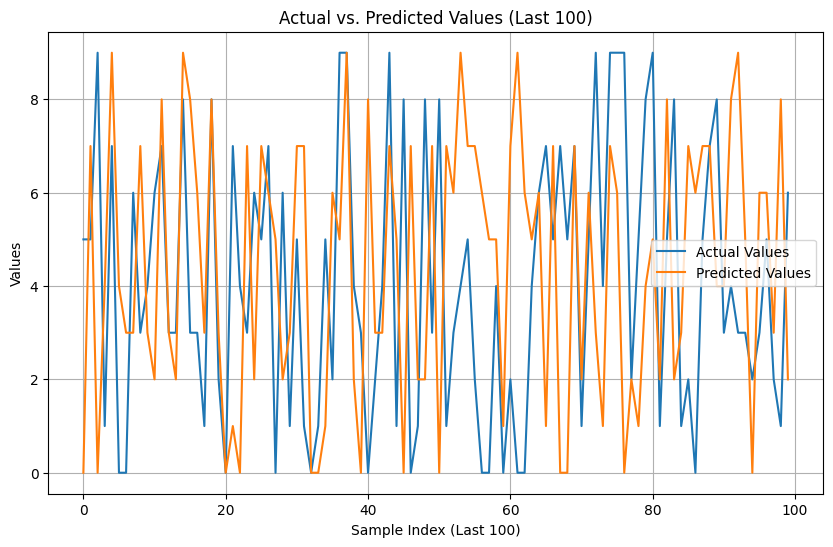

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the last 100 predicted and actual values (assuming enough test data)
last_100_predictions = predictions[-100:]
last_100_actuals = actual_numbers[-100:]

# Flatten predictions
last_100_predictions_flat = np.ravel(last_100_predictions)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(range(len(last_100_actuals)), last_100_actuals, label='Actual Values')
plt.plot(range(len(last_100_predictions_flat)), last_100_predictions_flat, label='Predicted Values')
plt.xlabel('Sample Index (Last 100)')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Last 100)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

# Testing split

test_actual_last_digits = actual_numbers[-200:]
test_predictions = predictions[-200:]

accuracy = accuracy_score(test_actual_last_digits, test_predictions)
print("Accuracy:", accuracy*100)

#precision

Accuracy: 11.5
